In [1]:
import torch
import torch.nn as nn

import sklearn.datasets
import matplotlib.pyplot as plt

from src.data.helpers import rotate, generate_model_zoo, get_moons_dataset
from src.model.models import MLP, DBModelSmall, DBModelMedium, DBModelBig
from src.visualization.visualize import plot_decision_boundary
from src.data.make_datasets import zoo_to_csv

from pathlib import Path

import csv
from tqdm.notebook import tqdm
import pandas as pd

## Two-moons

In [2]:
# Dataset
X,y = sklearn.datasets.make_moons(n_samples=1000, noise=0.1, random_state=42)

# Normalization
X = (X - X.mean(axis=0)) / X.std(axis=0)

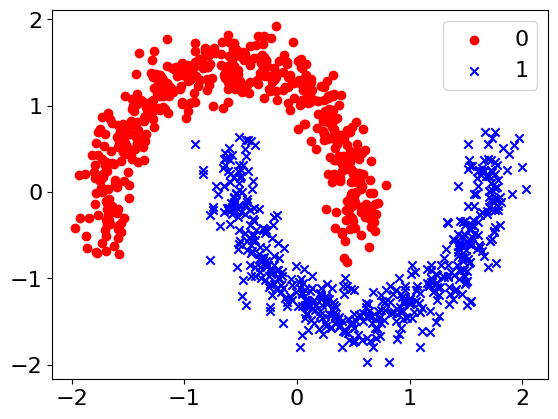

In [3]:
plt.rcParams.update({'font.size': 16})

X_rotated = rotate(X, 0)
plt.scatter(X_rotated[y==0,0], X_rotated[y==0,1], color='red', marker='o')
plt.scatter(X_rotated[y==1,0], X_rotated[y==1,1], color='blue', marker='x')

# plt.title("45°")
plt.legend(['0', '1'])
plt.show()

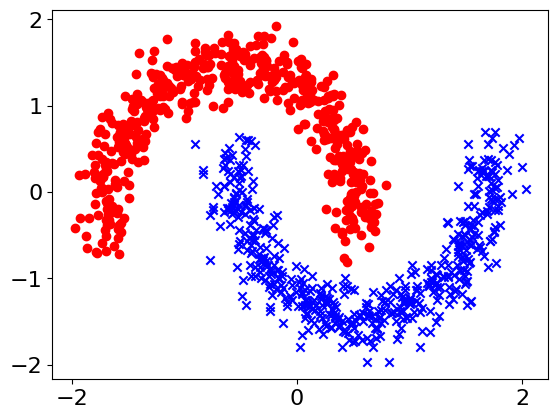

In [4]:
# Vizualization of different rotations
X_rotated = rotate(X, 0)
plt.scatter(X_rotated[y==0,0], X_rotated[y==0,1], color='red', marker='o')
plt.scatter(X_rotated[y==1,0], X_rotated[y==1,1], color='blue', marker='x')

# plt.title("45°")
plt.rcParams.update({'font.size': 24})
plt.show()

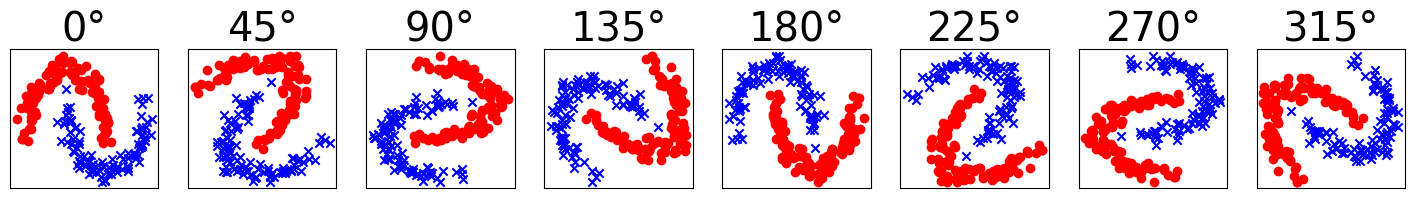

In [5]:
# Vizualization of different rotations
angles = [0, 45, 90, 135, 180, 225, 270, 315]

fig, ax = plt.subplots(1, 8, figsize=(18, 1.8), dpi=100)
X,y = sklearn.datasets.make_moons(n_samples=200, noise=0.1, random_state=42)
X = (X - X.mean(axis=0)) / X.std(axis=0)

for i, angle in enumerate(angles):
    X_rotated = rotate(X, angle)
    ax[i].scatter(X_rotated[y==0,0], X_rotated[y==0,1], color='red', marker='o')
    ax[i].scatter(X_rotated[y==1,0], X_rotated[y==1,1], color='blue', marker='x')
    # ax[i].legend(["0","1"])
    ax[i].set_title(f"{angle}°")

# Hide text
plt.setp(ax, xticks=[], yticks=[])

plt.savefig("../reports/two-moons.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Zoo #2

In [2]:
# Zoo config
zoo_name = "medium_zoo"
zoo_path = f"../models/{zoo_name}"
dataset_path = f"../data/{zoo_name}.csv"
angles = [0, 45, 90, 135, 180, 225, 270, 315]
models_per_angle = 10000
epochs = 60
learning_rate = 0.05

# Model config
input_dim = 2
hidden_dims = [10, 10]
output_dim = 1

seed = 42

In [ ]:
model_accuracies = generate_model_zoo(zoo_name, input_dim, hidden_dims, output_dim, angles, models_per_angle, learning_rate, epochs, seed=seed)

with open(f"../reports/{zoo_name}.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["model_name", "accuracy"])
    writer.writerows(model_accuracies)

In [6]:
model = MLP(input_dim, hidden_dims, output_dim)
zoo_to_csv(zoo_path, dataset_path, model)

100%|██████████| 20000/20000 [03:54<00:00, 85.33it/s]


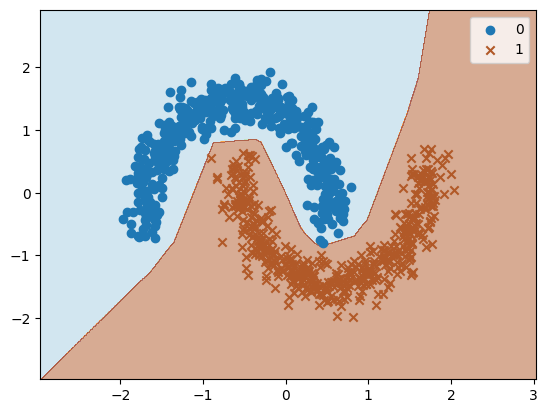

In [ ]:
dataset = pd.read_csv(dataset_path)
row = dataset.iloc[0]
angle = row["angle"]
params = row.drop(["model_name", "angle"])
params = torch.tensor(params.tolist(), dtype=torch.float32)
model = DBModelMedium(params, batch_first=False)

X, y = get_moons_dataset()
X = rotate(X, angle)
plot_decision_boundary(model, X, y)

## Zoo #1

In [6]:
# Zoo config
zoo_name = "zoo_small"
zoo_path = f"../models/{zoo_name}"
dataset_path = f"../data/{zoo_name}.csv"
angles = [0, 45, 90, 135, 180, 225, 270, 315]
models_per_angle = 10000
epochs = 200
learning_rate = 0.05

# Model config
input_dim = 2
hidden_dims = [8]
output_dim = 1

seed = 42

In [ ]:
model_accuracies = generate_model_zoo(zoo_name, input_dim, hidden_dims, output_dim, angles, models_per_angle, learning_rate, epochs, seed=seed)

with open(f"../reports/{zoo_name}.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["model_name", "accuracy"])
    writer.writerows(model_accuracies)


In [1]:
model = MLP(2, [8], 1)

zoo_to_csv(zoo_path, f"../data/{zoo_name}.csv", model)

100%|██████████| 80000/80000 [09:17<00:00, 143.42it/s]


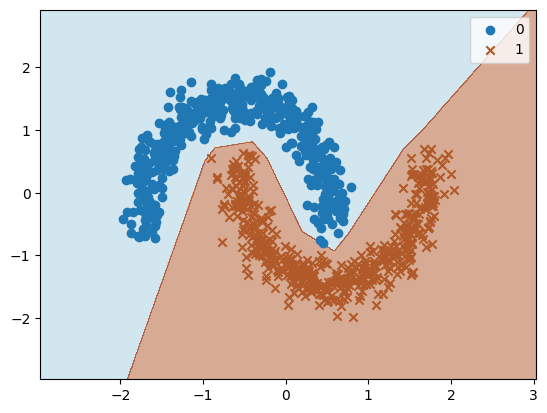

In [ ]:
dataset = pd.read_csv(dataset_path)
row = dataset.iloc[0]
angle = row["angle"]
params = row.drop(["model_name", "angle"])
params = torch.tensor(params.tolist(), dtype=torch.float32)
model = DBModelSmall(params, batch_first=False)

X, y = get_moons_dataset()
X = rotate(X, angle)
plot_decision_boundary(model, X, y)

## Extra angle

In [13]:
# Zoo config
zoo_name = "extra_angles"
zoo_path = f"../models/{zoo_name}"
dataset_path = f"../data/{zoo_name}.csv"
save_dir = Path("../models") / zoo_name
angles = [22, 67]
models_per_angle = 10000
epochs = 200
learning_rate = 0.05

# Model config
input_dim = 2
hidden_dims = [8]
output_dim = 1

seed = 42

In [ ]:
model_accuracies = generate_model_zoo(zoo_name, input_dim, hidden_dims, output_dim, angles, models_per_angle, learning_rate, epochs, seed=seed)

with open(f"../reports/{zoo_name}.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["model_name", "accuracy"])
    writer.writerows(model_accuracies)

In [6]:
model = MLP(2, [8], 1)
zoo_to_csv(zoo_path, f"../data/{zoo_name}.csv", model)

100%|██████████| 20000/20000 [02:51<00:00, 116.45it/s]


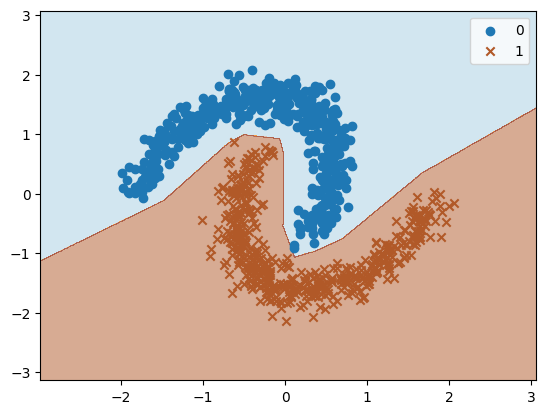

In [16]:
dataset = pd.read_csv(dataset_path)
row = dataset.iloc[0]
angle = row["angle"]
params = row.drop(["model_name", "angle"])
params = torch.tensor(params.tolist(), dtype=torch.float32)
model = DBModelSmall(params, batch_first=False)

X, y = get_moons_dataset()
X = rotate(X, angle)
plot_decision_boundary(model, X, y)

## Zoo #3

In [11]:
# Zoo config
zoo_name = "zoo_big"
zoo_path = f"../models/{zoo_name}"
dataset_path = f"../data/{zoo_name}.csv"
save_dir = Path("../models") / zoo_name
angles = [0, 45, 90, 135, 180, 225, 270, 315]
models_per_angle = 10000
epochs = 60
learning_rate = 0.05

# Model config
input_dim = 2
hidden_dims = [10, 10, 10]
output_dim = 1

seed = 42

In [ ]:
model_accuracies = generate_model_zoo(zoo_name, input_dim, hidden_dims, output_dim, angles, models_per_angle, learning_rate, epochs, seed=seed)

with open(f"../reports/{zoo_name}.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["model_name", "accuracy"])
    writer.writerows(model_accuracies)

In [7]:
model = MLP(2, [10, 10, 10], 1)

zoo_to_csv(zoo_path, f"../data/{zoo_name}.csv", model)

  0%|          | 0/80000 [00:00<?, ?it/s]

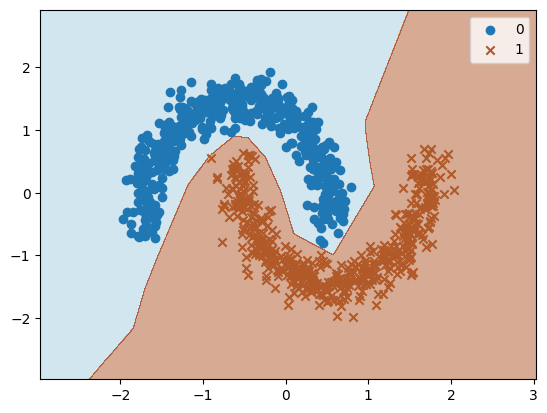

In [12]:
dataset = pd.read_csv(dataset_path)
row = dataset.iloc[0]
angle = row["angle"]
params = row.drop(["model_name", "angle"])
params = torch.tensor(params.tolist(), dtype=torch.float32)
model = DBModelBig(params, batch_first=False)

X, y = get_moons_dataset()
X = rotate(X, angle)
plot_decision_boundary(model, X, y)

## Zoo accuracies

In [9]:
zoo_small = pd.read_csv("../reports/zoo_small.csv")
zoo_medium = pd.read_csv("../reports/medium_zoo.csv")
zoo_big = pd.read_csv("../reports/zoo_big.csv")

zoo_small_accuracies = zoo_small["accuracy"]
zoo_medium_accuracies = zoo_medium["accuracy"]
zoo_big_accuracies = zoo_big["accuracy"]

print("Small zoo average accuracy: ", zoo_small_accuracies.mean()*100)
print("Small zoo accuracy std:", zoo_small_accuracies.std()*100)
print("Medium zoo average accuracy:", zoo_medium_accuracies.mean()*100)
print("Medium zoo accuracy std:", zoo_medium_accuracies.std()*100)
print("Big zoo average accuracy:", zoo_big_accuracies.mean()*100)
print("Big zoo accuracy std:", zoo_big_accuracies.std()*100)


Small zoo average accuracy: 99.87490625000001
Small zoo accuracy std: 0.20161581491204467
Medium zoo average accuracy: 99.85036625000001
Medium zoo accuracy std: 0.4927772328633429
Big zoo average accuracy: 99.95387375
Big zoo accuracy std: 0.3083385841400141


## Test and train set distances

In [5]:
from src.data.datasets import ModelParamsDataset

In [13]:
def find_closest_vectors_batched(dataset_train, dataset_test, batch_size=100):
    """
    Finds the closest vectors in dataset_train for each vector in dataset_test using batching.
    Args:
        dataset_train: Tensor of shape (N_train, D)
        dataset_test: Tensor of shape (N_test, D)
        batch_size: Size of batches to process dataset_test
    Returns:
        closest_vectors: Tensor of shape (N_test, D)
        closest_indices: Tensor of shape (N_test,)
    """
    closest_vectors = []
    closest_indices = []
    all_distances = []
    for i in range(0, len(dataset_test), batch_size):
        batch_test = dataset_test[i:i + batch_size] 
        distances = torch.cdist(batch_test, dataset_train, p=2)
        
        batch_indices = torch.argmin(distances, dim=1)
        batch_vectors = dataset_train[batch_indices] 
        
        all_distances.append(distances)
        closest_vectors.append(batch_vectors)
        closest_indices.append(batch_indices)
    
    closest_vectors = torch.cat(closest_vectors, dim=0)
    closest_indices = torch.cat(closest_indices, dim=0)
    average_distance = torch.stack(all_distances).mean()
    distances_std = torch.stack(all_distances).std()

    return closest_vectors, closest_indices, average_distance, distances_std

In [34]:
dataset_seed = 42
dataset_path = "../data/zoo_small.csv"
dataset_splits = [0.7, 0.2, 0.1]
batch_size = 128
dataset = ModelParamsDataset(dataset_path, 45)

torch.manual_seed(dataset_seed)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Split into train, validation and test sets
dataset_train, dataset_valid, dataset_test = torch.utils.data.random_split(dataset, dataset_splits)
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
dataloader_valid = torch.utils.data.DataLoader(dataset_valid, batch_size=batch_size, shuffle=True)
dataloader_test = torch.utils.data.DataLoader(dataset_test)

dataset_train_tensor = torch.stack([sample for sample, _ in dataset_train])
dataset_test_tensor = torch.stack([sample for sample, _ in dataset_test])
closest_vectors, closest_indices, average_distance, distances_std = find_closest_vectors_batched(dataset_train_tensor, dataset_test_tensor)

closest_distances = []
for i, (sample, angle) in enumerate(dataset_test):
    distance = torch.dist(sample, closest_vectors[i])
    closest_distances.append(distance.item())


closest_distance_mean = torch.tensor(closest_distances).mean()
closest_distance_std = torch.tensor(closest_distances).std()
closest_distance_min = torch.tensor(closest_distances).min()
closest_distance_max = torch.tensor(closest_distances).max()

print("SMALL ZOO")
print("Distances mean:", average_distance.item())
print("Distances std:", distances_std.item())
print("Closest distances mean:", closest_distance_mean.item())
print("Closest distances std:", closest_distance_std.item())
print("Closest distances min:", closest_distance_min.item())
print("Closest distances max:", closest_distance_max.item())

Small ZOO
Distances mean: 18.021638870239258
Distances std: 1.8541221618652344
Closest distances mean: 6.961311340332031
Closest distances std: 1.2049751281738281
Closest distances min: 2.3812718391418457
Closest distances max: 12.979178428649902


In [ ]:
dataset_seed = 42
dataset_path = "../data/zoo_medium_medium.csv"
dataset_splits = [0.7, 0.2, 0.1]
batch_size = 128
dataset = ModelParamsDataset(dataset_path, 45)

torch.manual_seed(dataset_seed)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Split into train, validation and test sets
dataset_train, dataset_valid, dataset_test = torch.utils.data.random_split(dataset, dataset_splits)
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
dataloader_valid = torch.utils.data.DataLoader(dataset_valid, batch_size=batch_size, shuffle=True)
dataloader_test = torch.utils.data.DataLoader(dataset_test)

dataset_train_tensor = torch.stack([sample for sample, _ in dataset_train])
dataset_test_tensor = torch.stack([sample for sample, _ in dataset_test])
closest_vectors, closest_indices, average_distance, distances_std = find_closest_vectors_batched(dataset_train_tensor, dataset_test_tensor)

closest_distances = []
for i, (sample, angle) in enumerate(dataset_test):
    distance = torch.dist(sample, closest_vectors[i])
    closest_distances.append(distance.item())


closest_distance_mean = torch.tensor(closest_distances).mean()
closest_distance_std = torch.tensor(closest_distances).std()
closest_distance_min = torch.tensor(closest_distances).min()
closest_distance_max = torch.tensor(closest_distances).max()

print("MEDIUM ZOO")
print("Distances mean:", average_distance.item())
print("Distances std:", distances_std.item())
print("Closest distances mean:", closest_distance_mean.item())
print("Closest distances std:", closest_distance_std.item())
print("Closest distances min:", closest_distance_min.item())
print("Closest distances max:", closest_distance_max.item())

Medium ZOO
Distances mean: 14.78957462310791
Distances std: 0.9526228904724121
Closest distances mean: 10.600822448730469
Closest distances std: 0.6108875274658203
Closest distances min: 8.03511905670166
Closest distances max: 12.678970336914062


In [ ]:
dataset_seed = 42
dataset_path = "../data/zoo_big.csv"
dataset_splits = [0.7, 0.2, 0.1]
batch_size = 128
dataset = ModelParamsDataset(dataset_path, 45)

torch.manual_seed(dataset_seed)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Split into train, validation and test sets
dataset_train, dataset_valid, dataset_test = torch.utils.data.random_split(dataset, dataset_splits)
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
dataloader_valid = torch.utils.data.DataLoader(dataset_valid, batch_size=batch_size, shuffle=True)
dataloader_test = torch.utils.data.DataLoader(dataset_test)

dataset_train_tensor = torch.stack([sample for sample, _ in dataset_train])
dataset_test_tensor = torch.stack([sample for sample, _ in dataset_test])
closest_vectors, closest_indices, average_distance, distances_std = find_closest_vectors_batched(dataset_train_tensor, dataset_test_tensor)

closest_distances = []
for i, (sample, angle) in enumerate(dataset_test):
    distance = torch.dist(sample, closest_vectors[i])
    closest_distances.append(distance.item())

closest_distance_mean = torch.tensor(closest_distances).mean()
closest_distance_std = torch.tensor(closest_distances).std()
closest_distance_min = torch.tensor(closest_distances).min()
closest_distance_max = torch.tensor(closest_distances).max()

print("BIG ZOO")
print("Distances mean:", average_distance.item())
print("Distances std:", distances_std.item())
print("Closest distances mean:", closest_distance_mean.item())
print("Closest distances std:", closest_distance_std.item())
print("Closest distances min:", closest_distance_min.item())
print("Closest distances max:", closest_distance_max.item())

BIG ZOO
Distances mean: 14.950889587402344
Distances std: 0.7902837991714478
Closest distances mean: 11.705355644226074
Closest distances std: 0.5316880941390991
Closest distances min: 9.284794807434082
Closest distances max: 13.66835880279541
